In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
X=pd.read_csv("Linear_X_Train.csv").values
Y=pd.read_csv("Linear_Y_Train.csv").values

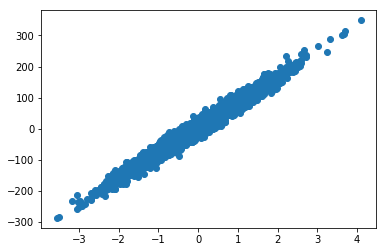

In [5]:
plt.scatter(X,Y)

# Normalise Data

In [4]:
mu=X.mean()
sigma=X.std()
X=(X-mu)/sigma

# Linear Regression

In [9]:
def hypothesis(theta,x):
    return theta[0]+theta[1]*x

In [10]:
def error(theta,X,Y):
    err=0
    m=X.shape[0]
    
    for i in range(m):
        err+=((hypothesis(theta,X[i])-Y[i])**2)
    return err/m

In [26]:
def gradient(theta,X,Y):
    m=X.shape[0]
    grad=np.zeros((2,))
    
    for i in range(m):
        hx=hypothesis(theta,X[i])
        grad[0]+=(hx-Y[i])
        grad[1]+=(hx-Y[i])*X[i]
        
    return grad/m

In [27]:
def gradient_descent(X,Y,lr=0.1,max_itr=100):
    m=X.shape[0]
    theta=np.zeros((2,))
    error_list=[]
    theta_list=[]
    
    for i in range(max_itr):
        err=error(theta,X,Y)
        error_list.append(err)
        theta_list.append((theta[0],theta[1]))
        theta+=-lr*gradient(theta,X,Y)
        
    return theta,theta_list,error_list

In [28]:
theta,theta_list,error_list=gradient_descent(X,Y)

In [23]:
theta

array([-1.32474753e+257, -1.54788318e+259])

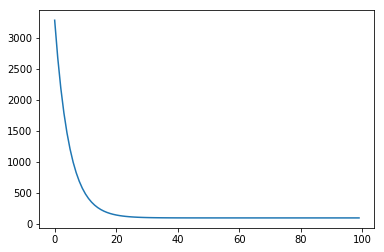

In [30]:
plt.plot(error_list)

In [31]:
Y_pred=hypothesis(theta,X)

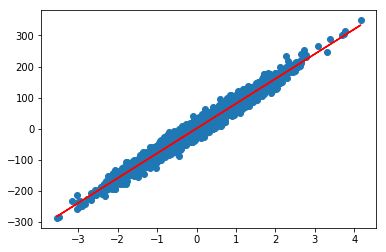

In [33]:
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

# Predict for New Datafor X_test

In [37]:
X_test=pd.read_csv("Linear_X_test.csv").values

In [38]:
X_test=(X_test-mu)/sigma

In [39]:
Y_pred=hypothesis(theta,X_test)

In [40]:
Y_pred

array([[-147.52455668],
       [ -66.26523828],
       [-200.05677952],
       ...,
       [  14.03783023],
       [ -18.66567319],
       [ -51.07459028]])

In [ ]:
df = pd.DataFrame(data=Y_pred, columns=['y'])
df.to_csv("ans.csv", index=False)

# Evaluation

In [42]:
def evaluate(Y_actual, Y_pred):
    num = np.sum((Y_actual - Y_pred)**2)
    denom = np.sum((Y_actual - Y_actual.mean())**2)
    
    return (1 - (num/denom))*100

In [43]:
evaluate(hypothesis(theta,X),Y)

97.00911640073177

## Scikit -Learn Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

In [44]:
model=LinearRegression()

In [45]:
model.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [46]:
Y_pred=model.predict(X)

In [47]:
model.score(X,Y)

0.9709612233822353